In [103]:
import pandas as pd
import numpy as np

num_topics = 10
data_path = "~/Desktop/DataViz/whisper/whisperVis/data/topicModeling/pro"
df = pd.read_csv(data_path + f"/{num_topics}/beta.csv")

display(df.head())
print(df.shape)

,topic,term,beta
0,1,1_hour_break,3.333175e-24
1,2,1_hour_break,3.228877e-24
2,3,1_hour_break,6.486790e-12
3,4,1_hour_break,2.023997e-12
4,5,1_hour_break,3.937727e-08


(66410, 3)


## Computing topic word distribution

In [104]:
topic_word_distr = []
imp_words = []
terms = df[df.topic == 1].term.values.tolist()

num_topics = len(df.topic.unique())
for i in range(1, num_topics+1):
    topic = df[df.topic == i] 
    vals = topic.beta.values.tolist()
    topic_word_distr += [np.asarray(vals)]
    words = [terms[i] for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    imp_words.append(words)
    
print(len(topic_word_distr))
print(len(imp_words))

10
10


# Dissimilarity Measure

In [105]:
from scipy.spatial import distance

dist = []
for i in range(num_topics): 
    t1 = topic_word_distr[i]
    d1 = []
    for j in range(num_topics):
        t2 = topic_word_distr[j]
        d = distance.jensenshannon(t1, t2)
        d1.append(d)
    dist.append(d1)

print(dist)

[[0.0, 0.0460335568329371, 0.8239785780015826, 0.8243718930161399, 0.8211542490569189, 0.8225457748989495, 0.7851704726560149, 0.82126436097393, 0.8065968339046721, 0.7845333327332118], [0.0460335568329371, 0.0, 0.8239937321342545, 0.8242772665116179, 0.8212731738765019, 0.8225717183828379, 0.7849308197066048, 0.8213019164955101, 0.8064309599207397, 0.7847485154928479], [0.8239785780015826, 0.8239937321342545, 0.0, 0.824060737580206, 0.8252000850367154, 0.81680593030572, 0.825419173454282, 0.8256744238046658, 0.8242911966073121, 0.813297188146814], [0.8243718930161399, 0.8242772665116179, 0.824060737580206, 0.0, 0.8048349275604464, 0.8236719663878131, 0.8242863663741836, 0.8186766604143078, 0.819474639460868, 0.8226448164030605], [0.8211542490569189, 0.8212731738765019, 0.8252000850367154, 0.8048349275604464, 0.0, 0.8269855744936826, 0.8201284708363028, 0.8219212236395543, 0.826349042288878, 0.8040374766410577], [0.8225457748989495, 0.8225717183828379, 0.81680593030572, 0.8236719663878

# Dimensionality Reduction

## TSNE

In [106]:
# Clustering
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
X_tsne = tsne.fit_transform(topic_word_distr)

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.707256
[t-SNE] KL divergence after 1000 iterations: 0.243565


## PCA

In [107]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_tsne = pca.fit_transform(topic_word_distr)

In [108]:
print(X_tsne)

[[-0.04497959 -0.05855797]
 [-0.04487099 -0.05833641]
 [ 0.33999942  0.01865963]
 [-0.02697791 -0.01677193]
 [-0.06628414  0.2549494 ]
 [-0.02066541 -0.0186833 ]
 [-0.04446817 -0.05338942]
 [-0.03259291 -0.02629765]
 [-0.0279728  -0.01961118]
 [-0.03118751 -0.02196117]]


# Visualization

In [109]:
# Generate random colors

import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
colormap = np.asarray(get_colors(num_topics)) 
print(colormap)

['#8e55fd' '#5431aa' '#bdf331' '#00c603' '#9157ff' '#453ca2' '#ca2270'
 '#88ec17' '#b7b09c' '#2f41f9']


In [110]:
df_cluster = pd.DataFrame()
df_cluster['X'] = X_tsne[:, 0]
df_cluster['Y'] = X_tsne[:, 1]
df_cluster['Topic'] = range(num_topics)
df_cluster['Topic_Words'] = imp_words

cluster_colors = dict()
for c in range(num_topics): 
    cluster_colors[c] = colormap[c]
    
df_cluster['Colors'] = df_cluster['Topic'].apply(lambda l: cluster_colors[l])
df_cluster.sort_values(by=['Topic'], inplace=True)

df_cluster['Topic'] = df_cluster['Topic']+1
display(df_cluster.head())

,X,Y,Topic,Topic_Words,Colors
0,-0.044980,-0.058558,1,"[free, employe, discount, schedul, day, decent...",#8e55fd
1,-0.044871,-0.058336,2,"[free, employe, discount, schedul, day, decent...",#5431aa
2,0.339999,0.018660,3,"[benefit, manag, lot, worker, decent_pay, easi...",#bdf331
3,-0.026978,-0.016772,4,"[pay_benefit, advanc, help, salari, worklif, c...",#00c603
4,-0.066284,0.254949,5,"[pay, hour, flexibl, cowork, balanc, cultur, f...",#9157ff


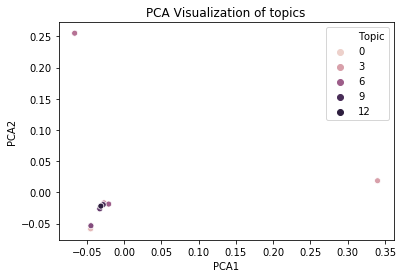

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.scatterplot(x = "X", y="Y", hue="Topic", data=df_cluster)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA Visualization of topics")
plt.savefig(os.path.expanduser("~/Desktop/img/PCApro.png"))
plt.show()

In [112]:
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.io import export_png
output_notebook()

Loading BokehJS ...

In [113]:
source = ColumnDataSource(dict(
    x=df_cluster['X'],
    y=df_cluster['Y'],
    color=df_cluster['Colors'],
    label=df_cluster['Topic'],
    topic_words = df_cluster["Topic_Words"]
))

In [114]:
title = 'PCA visualization of topics (pro)'

plot_lda = figure(plot_width=1000, plot_height=700,
                     title=title, tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1, 
                     x_axis_label = "PCA1", y_axis_label = "PCA2")

plot_lda.scatter(x='x', y='y',  legend='label', source=source,
                 color='color', alpha=0.8)#'msize', )

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = { "Topic": "@label  <br> Topic_words: @topic_words "}
plot_lda.legend.location = "top_left"

export_png(plot_lda, filename=os.path.expanduser("~/Desktop/img/PCAcon.png"))
show(plot_lda)

# Saving File

In [115]:
display(df_cluster.head())
display(df_cluster.shape)

,X,Y,Topic,Topic_Words,Colors
0,-0.044980,-0.058558,1,"[free, employe, discount, schedul, day, decent...",#8e55fd
1,-0.044871,-0.058336,2,"[free, employe, discount, schedul, day, decent...",#5431aa
2,0.339999,0.018660,3,"[benefit, manag, lot, worker, decent_pay, easi...",#bdf331
3,-0.026978,-0.016772,4,"[pay_benefit, advanc, help, salari, worklif, c...",#00c603
4,-0.066284,0.254949,5,"[pay, hour, flexibl, cowork, balanc, cultur, f...",#9157ff


(10, 5)

In [116]:
df_cluster.to_csv(data_path + f"/{num_topics}/topic_center.csv")

# Topic Proportion

In [117]:
df = pd.read_csv(data_path + f"/{num_topics}/gamma.csv")

display(df.head())
print(df.shape)

,document,topic,gamma
0,1,1,0.060023
1,2,1,0.051964
2,3,1,0.129970
3,4,1,0.043025
4,5,1,0.124641


(336200, 3)


In [118]:
lst = []
for t in range(1, num_topics+1): 
    df_topic = df[df.topic == t]
    lst.append(df_topic.gamma.sum())

tot = sum(lst)
lst = np.array([round(i/tot, 4) for i in lst])

df_cluster["Topic_Proportion"] = lst
display(df_cluster.head())

,X,Y,Topic,Topic_Words,Colors,Topic_Proportion
0,-0.044980,-0.058558,1,"[free, employe, discount, schedul, day, decent...",#8e55fd,0.0688
1,-0.044871,-0.058336,2,"[free, employe, discount, schedul, day, decent...",#5431aa,0.0710
2,0.339999,0.018660,3,"[benefit, manag, lot, worker, decent_pay, easi...",#bdf331,0.1165
3,-0.026978,-0.016772,4,"[pay_benefit, advanc, help, salari, worklif, c...",#00c603,0.1013
4,-0.066284,0.254949,5,"[pay, hour, flexibl, cowork, balanc, cultur, f...",#9157ff,0.1133


In [119]:
df_cluster.to_csv(data_path + f"/{num_topics}/topic_center.csv")

# Topic Term Distribution

In [120]:
df = pd.read_csv(data_path + f"/{num_topics}/beta.csv")
display(df.head())
tot_term = df[df.topic == 1]['term'].count()
print(tot_term)

,topic,term,beta
0,1,1_hour_break,3.333175e-24
1,2,1_hour_break,3.228877e-24
2,3,1_hour_break,6.486790e-12
3,4,1_hour_break,2.023997e-12
4,5,1_hour_break,3.937727e-08


6641


In [121]:
terms = df[df.topic == 1]["term"].values.tolist()
lst = []
i = 1
for t in terms: 
    term_prob = df[df.term == t]['beta'].sum()/num_topics
    lst.append([i, t, term_prob])
    i = i+1
df_term = pd.DataFrame(lst, columns=['Term_Id', 'Term', 'Term_Prob'])
display(df_term.head())
display(df_term.shape)

,Term_Id,Term,Term_Prob
0,1,1_hour_break,0.000008
1,2,1_hour_lunch,0.000762
2,3,1_hr_lunch,0.000094
3,4,10_discount_card,0.000021
4,5,10_discount_flexibl,0.000014


(6641, 3)

In [122]:
for t in terms: 
    term_prob = df_term.loc[df_term.Term == t, "Term_Prob"].iloc[0]
    df.loc[df.term == t, "Term_Prob"] = term_prob
    
df["Term_Freq"] = df.Term_Prob * tot_term

In [123]:
display(df.head())

,topic,term,beta,Term_Prob,Term_Freq
0,1,1_hour_break,3.333175e-24,0.000008,0.051773
1,2,1_hour_break,3.228877e-24,0.000008,0.051773
2,3,1_hour_break,6.486790e-12,0.000008,0.051773
3,4,1_hour_break,2.023997e-12,0.000008,0.051773
4,5,1_hour_break,3.937727e-08,0.000008,0.051773


In [124]:
df.rename(columns={"topic": "Topic", "term": "Term", "beta": "Beta"}, inplace=True)
display(df.head())

,Topic,Term,Beta,Term_Prob,Term_Freq
0,1,1_hour_break,3.333175e-24,0.000008,0.051773
1,2,1_hour_break,3.228877e-24,0.000008,0.051773
2,3,1_hour_break,6.486790e-12,0.000008,0.051773
3,4,1_hour_break,2.023997e-12,0.000008,0.051773
4,5,1_hour_break,3.937727e-08,0.000008,0.051773


# Save File

In [125]:
df.to_csv(data_path + f"/{num_topics}/topic_term_distr.csv")

# How to calculate relevance?

In [126]:
df_relevance = df.copy()

In [160]:
lam = .5
df_relevance["Relevance"] = lam*df_relevance.Beta + (1-lam)*df_relevance.Beta/df_relevance.Term_Prob
display(df_relevance.head())

,Topic,Term,Beta,Term_Prob,Term_Freq,Relevance
0,1,1_hour_break,3.333175e-24,0.000008,0.051773,2.137764e-19
1,2,1_hour_break,3.228877e-24,0.000008,0.051773,2.070871e-19
2,3,1_hour_break,6.486790e-12,0.000008,0.051773,4.160364e-07
3,4,1_hour_break,2.023997e-12,0.000008,0.051773,1.298110e-07
4,5,1_hour_break,3.937727e-08,0.000008,0.051773,2.525499e-03


In [161]:
df5 = df_relevance[df_relevance.Topic == 1]
relevant_term = df5.sort_values(by="Relevance", ascending=False)[:10]

In [162]:
relevant_term.sort_values(by="Term_Freq", ascending=False, inplace=True)

In [163]:
relevant_term["Term_Freq"] = np.round(relevant_term["Term_Freq"])

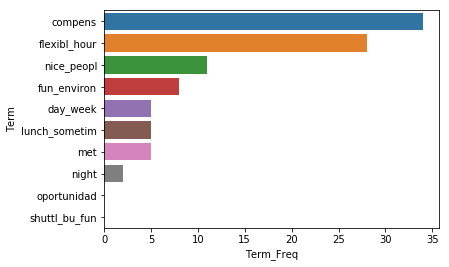

In [164]:
sns.barplot(x="Term_Freq", y="Term", data=relevant_term)